#Import Library

In [2]:
!pip install pythainlp
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 4.9 MB/s eta 0:00:00


In [3]:
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction import DictVectorizer
from pythainlp.tokenize import word_tokenize
from pythainlp.coref import coreference_resolution
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Load Data

In [4]:
url = "https://raw.githubusercontent.com/lnwidea/ML-Project/main/Data_ML.csv"
df = pd.read_csv(url)

#Explore Data

In [5]:
df.head()

,Text,ans1,ans2,ans3,ans4,ans5,Final
0,ครูอึ้ง! โดนเซอร์ไพรส์ แต่ดันเจอเซอร์ไพรส์กลับ..,5,5,5,5,5,5
1,วันนี้พระจันทร์น่ารักมาก :-),1,2,2,2,1,2
2,ฮือฮา! 'พระพุทธรูปสิ่งศักดิ์สิทธิ์' ที่อยู่ในส...,5,5,5,5,5,5
3,"""กลัวเธอจะหนีไป..กลัวเธอจะใจร้าย""",4,4,4,0,4,4
4,มีคนแปลกหน้า เข้ามาหาเรื่องเรา,3,3,3,3,3,3


In [6]:
df['Text'][5]

'ขอให้พบเจอความรักที่ดีตลอดปีกันนะครับ :)'

In [7]:
len(df)

315

In [8]:
df.keys()

Index(['Text', 'ans1', 'ans2', 'ans3', 'ans4', 'ans5', 'Final'], dtype='object')

In [9]:
df.ans5

0      5
1      1
2      5
3      4
4      3
      ..
310    3
311    4
312    4
313    4
314    4
Name: ans5, Length: 315, dtype: int64

In [10]:
df['Final'].value_counts()

3    62
1    56
2    53
0    53
4    47
5    44
Name: Final, dtype: int64

In [11]:
df[['ans1','ans2']]

,ans1,ans2
0,5,5
1,1,2
2,5,5
3,4,4
4,3,3
...,...,...
310,3,3
311,4,4
312,4,4
313,4,4


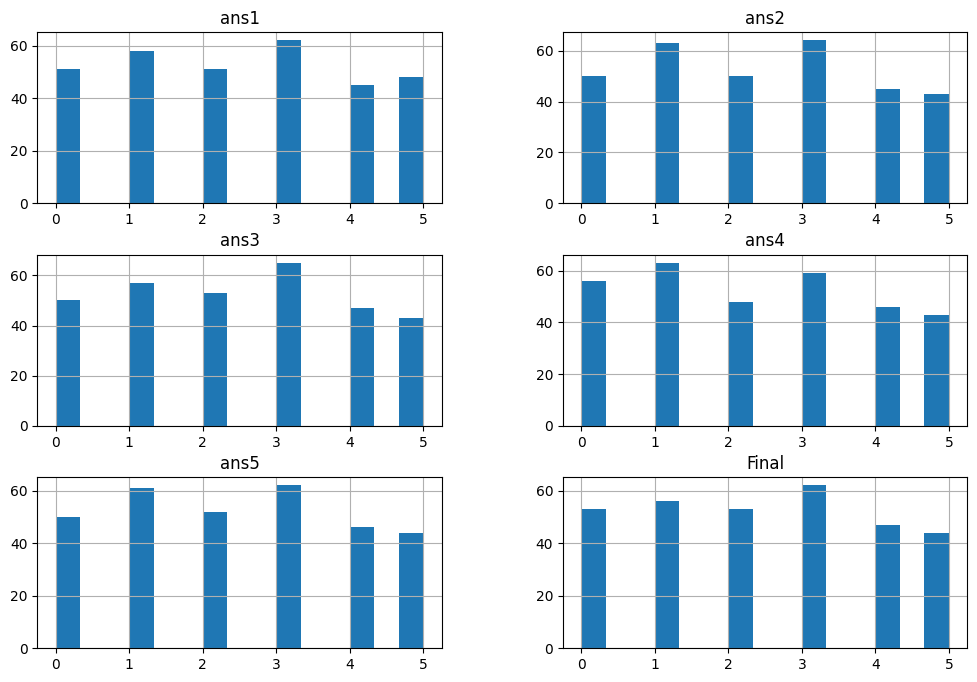

In [12]:
df.hist(bins = 15, figsize = (12,8))
plt.show()

# Preprocess data

In [13]:
df['Clean_Text'] = df['Text']
df

,Text,ans1,ans2,ans3,ans4,ans5,Final,Clean_Text
0,ครูอึ้ง! โดนเซอร์ไพรส์ แต่ดันเจอเซอร์ไพรส์กลับ..,5,5,5,5,5,5,ครูอึ้ง! โดนเซอร์ไพรส์ แต่ดันเจอเซอร์ไพรส์กลับ..
1,วันนี้พระจันทร์น่ารักมาก :-),1,2,2,2,1,2,วันนี้พระจันทร์น่ารักมาก :-)
2,ฮือฮา! 'พระพุทธรูปสิ่งศักดิ์สิทธิ์' ที่อยู่ในส...,5,5,5,5,5,5,ฮือฮา! 'พระพุทธรูปสิ่งศักดิ์สิทธิ์' ที่อยู่ในส...
3,"""กลัวเธอจะหนีไป..กลัวเธอจะใจร้าย""",4,4,4,0,4,4,"""กลัวเธอจะหนีไป..กลัวเธอจะใจร้าย"""
4,มีคนแปลกหน้า เข้ามาหาเรื่องเรา,3,3,3,3,3,3,มีคนแปลกหน้า เข้ามาหาเรื่องเรา
...,...,...,...,...,...,...,...,...
310,มันหนึบคือเหี้ยไรว่ะ รสชาสเหมือนรองเท้านักเรีย...,3,3,3,0,3,3,มันหนึบคือเหี้ยไรว่ะ รสชาสเหมือนรองเท้านักเรีย...
311,มองผ่านเหมือนแมลงสาบบินอ่ะ กัว แง,4,4,4,4,4,4,มองผ่านเหมือนแมลงสาบบินอ่ะ กัว แง
312,รู้เลยบ้านนี้ใครใหญ่สุด กัว,4,4,4,4,4,4,รู้เลยบ้านนี้ใครใหญ่สุด กัว
313,บาร์โค้ดทำถึงเกินอะ กัว😭😭😭😭,4,4,4,4,4,4,บาร์โค้ดทำถึงเกินอะ กัว😭😭😭😭


In [14]:
import emoji


def set_emoji(text):
  emoji_list = emoji.emoji_list(text)
  new = emoji.replace_emoji(text, replace='').strip()
  for json in emoji_list:
      this_emoji = json['emoji']
      new += ' ' + this_emoji
  return new

df['Clean_Text'] = df['Clean_Text'].apply(set_emoji)
df['Clean_Text'][108]

'และนี้คือสิ่งที่เราไปเจอหน้างาน  เราเป็นคนแรกที่เข้าไปนั่งแล้วถูกเชิญออก นี้คือสิ่งที่ร้านทำ  เข็ดแล้ว ถ้าไม่ได้แนะนำอย่าซื้อพวกร้านแบบนี้ ประวัติร้านดีเห็นกดคอนอื่นๆ อีก เสียความรู้สึกสุดๆ #buybybei 😏'

In [15]:
from pythainlp.util import emoji_to_thai

def convert(text):
  final = "".join(u for u in text)
  final = emoji_to_thai(final)
  return final

df['Clean_Text'] = df['Clean_Text'].apply(convert)
df['Clean_Text'][108]

'และนี้คือสิ่งที่เราไปเจอหน้างาน  เราเป็นคนแรกที่เข้าไปนั่งแล้วถูกเชิญออก นี้คือสิ่งที่ร้านทำ  เข็ดแล้ว ถ้าไม่ได้แนะนำอย่าซื้อพวกร้านแบบนี้ ประวัติร้านดีเห็นกดคอนอื่นๆ อีก เสียความรู้สึกสุดๆ #buybybei :แสยะยิ้ม:'

In [16]:
#Do a stopwords in Clean_Text
from pythainlp.corpus import thai_stopwords

stopwords = list(thai_stopwords())

def text_process(text):
  text = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
  text = word_tokenize(text)
  text = " ".join(word for word in text)
  text = " ".join(word for word in text.split() if word.lower not in stopwords)
  return text

df['Clean_Text'] = df['Clean_Text'].apply(text_process)
df['Clean_Text'][108]

'และ นี้ คือ สิ่ง ที่ เรา ไป เจอ หน้า งาน เรา เป็น คน แรก ที่ เข้าไป นั่ง แล้ว ถูก เชิญ ออก นี้ คือ สิ่ง ที่ ร้าน ทำ เข็ด แล้ว ถ้า ไม่ ได้ แนะนำ อย่า ซื้อ พวก ร้าน แบบนี้ ประวัติ ร้าน ดี เห็น กด คอน อื่น อีก เสียความรู้สึก สุด #buybybei แสยะ ยิ้ม'

In [17]:
X = df.iloc[:,7].values
y = df.iloc[:,6].values

In [18]:
X

array(['ครู อึ้ง โดน เซอร์ไพรส์ แต่ ดัน เจอ เซอร์ไพรส์ กลับ',
       'วันนี้ พระจันทร์ น่ารัก มาก - )',
       "ฮือฮา ' พระพุทธรูป สิ่งศักดิ์สิทธิ์ ' ที่อยู่ ใน สะพานเดินเรือ หลวง สุโขทัย ยัง ตั้งตรง อยู่ ที่ เดิม แม้ จม ใต้ ทะเล นาน นับ ปี",
       'กลัว เธอ จะ หนี ไป กลัว เธอ จะ ใจร้าย',
       'มี คนแปลกหน้า เข้ามา หาเรื่อง เรา',
       'ขอให้ พบ เจอ ความรัก ที่ ดี ตลอดปี กัน นะ ครับ )',
       'คลาสสิค มา กก กก ชอบ เขียนจดหมาย ถึง แฟน',
       'Social แห่ หวาดกลัว BTC ลง หนัก กังวล ได้ เห็น $20,000-25,000',
       'ฉัน ดีใจ น้ำตา จะ ใหล', 'ขอให้ หนู แข็งแรง เติบโต อยู่ ใน นี้ นะ',
       'ทรมาน กับ ความรู้สึก แบบนี้ ไม่ อยาก ตื่น มา เลย',
       'แต่ ที่ ไม่ มี คือ ความสุข ไม่ มีอิสระ จะ ไป ไหน ทำ อะไร ก็ ไม่ ได้',
       'ฉัน จะ ไม่ เปิด ประตู บ้าน ทิ้ง ไว้ เด็ดขาด ฉัน กลัว',
       'มี ใคร คุย เป็นเพื่อน เรา ได้ บ้าง',
       'เกิด เหตุการณ์ ไม่ คาดฝัน ใน งานแต่งงาน ที่ อุซเบกิสถาน เมื่อ เจ้าบ่าว ตบ เจ้าสาว กลาง งาน ระหว่าง เล่น เกม ทาย ขนม',
       'ข่าวดี ประจำเดือน', 'ยาคูลท์ 

In [19]:
y

array([5, 2, 5, 4, 3, 2, 2, 4, 1, 2, 0, 0, 4, 0, 5, 1, 2, 1, 3, 4, 4, 5,
       1, 4, 0, 1, 1, 3, 3, 0, 0, 1, 0, 5, 2, 3, 2, 3, 1, 4, 1, 3, 1, 5,
       5, 1, 3, 2, 2, 5, 5, 5, 4, 0, 2, 0, 0, 4, 2, 0, 0, 3, 5, 1, 1, 2,
       4, 4, 0, 3, 0, 0, 1, 4, 4, 4, 0, 2, 4, 4, 5, 5, 0, 3, 3, 4, 3, 1,
       0, 3, 3, 5, 5, 3, 1, 5, 2, 2, 1, 1, 1, 0, 0, 2, 1, 2, 1, 3, 0, 3,
       3, 1, 1, 1, 2, 2, 0, 0, 0, 2, 4, 4, 4, 5, 5, 5, 5, 2, 1, 0, 3, 3,
       3, 1, 1, 1, 3, 4, 5, 3, 5, 1, 4, 2, 2, 2, 0, 0, 0, 5, 3, 5, 3, 0,
       2, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 1, 3, 1, 3, 4, 1, 3, 3, 3, 2, 5,
       2, 2, 5, 5, 5, 5, 1, 5, 4, 4, 4, 4, 4, 4, 4, 0, 3, 1, 0, 2, 2, 2,
       2, 2, 4, 4, 4, 3, 1, 1, 2, 1, 5, 1, 5, 5, 2, 5, 5, 5, 5, 2, 2, 3,
       2, 3, 3, 1, 1, 1, 0, 4, 3, 0, 3, 2, 2, 5, 0, 3, 0, 1, 4, 2, 2, 4,
       5, 5, 1, 1, 0, 2, 2, 0, 5, 1, 3, 4, 4, 0, 3, 1, 5, 4, 1, 4, 1, 0,
       0, 2, 0, 1, 4, 1, 4, 3, 3, 3, 4, 3, 2, 2, 3, 1, 2, 2, 5, 2, 3, 2,
       1, 1, 5, 0, 2, 0, 3, 1, 3, 1, 1, 2, 0, 0, 0,

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True, stratify = y,random_state=2002)

# Pipeline

In [21]:
from sklearn.pipeline import Pipeline
pipe_nb = Pipeline(steps=[('cv',CountVectorizer()),('clf', MultinomialNB())])
pipe_nb.fit(x_train, y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('clf', MultinomialNB())])

In [22]:
pipe_nb.score(x_test,y_test)

0.5238095238095238

In [23]:
from sklearn.metrics import confusion_matrix, f1_score ,accuracy_score

emotions = ["Sad", "Happy", "Love", "Angry", "Fear", "Surprise"]
y_pred_pipeline = pipe_nb.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred_pipeline, target_names = emotions))
print('F1 score =',f1_score(y_test, y_pred_pipeline, average='macro'))
print('Accuracy =',accuracy_score(y_test, y_pred_pipeline))
print("Accuracy on train:  ",pipe_nb.score(x_train,y_train).round(3),'\n')
print("Accuracy on test: ",pipe_nb.score(x_test,y_test).round(3),'\n')

Classification Report:
               precision    recall  f1-score   support

         Sad       0.53      0.73      0.62        11
       Happy       0.50      0.27      0.35        11
        Love       0.64      0.64      0.64        11
       Angry       0.42      0.67      0.52        12
        Fear       0.50      0.33      0.40         9
    Surprise       0.67      0.44      0.53         9

    accuracy                           0.52        63
   macro avg       0.54      0.51      0.51        63
weighted avg       0.54      0.52      0.51        63

F1 score = 0.5090252989683729
Accuracy = 0.5238095238095238
Accuracy on train:   0.968 

Accuracy on test:  0.524 



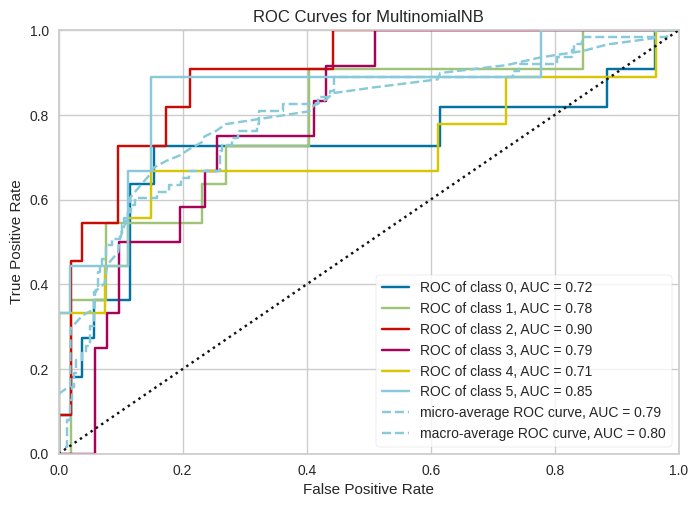

<Axes: title={'center': 'ROC Curves for MultinomialNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [24]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(pipe_nb)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

In [25]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('tfidf',  TfidfTransformer()),('lr',LogisticRegression( solver = 'lbfgs', multi_class= 'multinomial'))])
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('lr', LogisticRegression(multi_class='multinomial'))])

In [26]:
pipe_lr.score(x_test,y_test)

0.5396825396825397

In [27]:
y_pred_pipeline_lr = pipe_lr.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred_pipeline_lr, target_names = emotions))
print('F1 score =',f1_score(y_test, y_pred_pipeline_lr, average='macro'))
print('Accuracy =',accuracy_score(y_test, y_pred_pipeline_lr))
print("Accuracy on train:  ",pipe_lr.score(x_train,y_train).round(3),'\n')
print("Accuracy on test: ",pipe_lr.score(x_test,y_test).round(3),'\n')

Classification Report:
               precision    recall  f1-score   support

         Sad       0.67      0.55      0.60        11
       Happy       0.50      0.64      0.56        11
        Love       0.50      0.64      0.56        11
       Angry       0.42      0.67      0.52        12
        Fear       0.67      0.22      0.33         9
    Surprise       1.00      0.44      0.62         9

    accuracy                           0.54        63
   macro avg       0.63      0.53      0.53        63
weighted avg       0.61      0.54      0.53        63

F1 score = 0.530807830162669
Accuracy = 0.5396825396825397
Accuracy on train:   0.992 

Accuracy on test:  0.54 



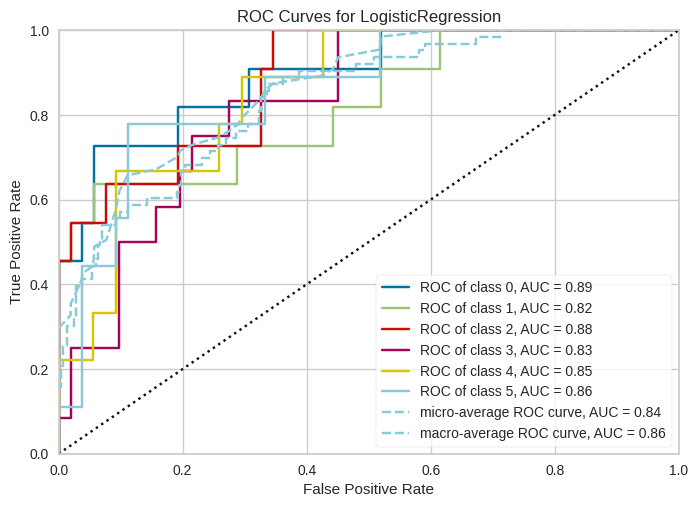

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [28]:
visualizer = ROCAUC(pipe_lr)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

# Test on unseen data

In [37]:
ex1 = "แต่หนูโกดไมมหาลัยต้องให้หนูเรียนวันเสาร์ นอยๆๆๆๆๆ"
x = pipe_lr.predict([ex1])
emotions[x[0]]

'Happy'

In [38]:
ex1 = text_process(ex1)
print(ex1)
x = pipe_lr.predict([ex1])
emotions[x[0]]

แต่ หนู โก ดไม มหาลัย ต้อง ให้ หนู เรียน วัน เสาร์ นอ ย


'Angry'

In [40]:
y = pipe_lr.predict_proba([ex1])
y

array([[0.1823474 , 0.14842353, 0.14532417, 0.32425434, 0.10060137,
        0.09904918]])

In [39]:
x = pipe_nb.predict([ex1])
emotions[x[0]]

'Angry'

# Save model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Saving the model to run app
import joblib
joblib.dump(pipe_lr, open('/content/drive/MyDrive/ML Project/emotion_model.pkl','wb'))